# 201601639 홍승현 - 인공지능과 딥러닝 과제 1

# 문제 1
<img src="./problem1.png" width="800" height="300">

## 다음 훈련집합을 3차원 공간에 그리시오. 이 데이터를 최소 오류율로 분류하는 퍼셉트론을 제시하시오.

- x1 = [0, 0, 0]    y1 = [1]
- x2 = [0, 1, 1]    y2 = [-1]
- x3 = [1, 1, 1]    y3 = [1]
- x4 = [1, 0, 1]    y4 = [-1]
- x5 = [0, 0, 1]    y5 = [1]
- x6 = [0, 1, 0]    y6 = [-1]

<!--
### 결정 직선
- x1 + x2 + x3 +  b = 0
-->

## 평면 상에 점을 그려보자

- 아래 코드를 통해 각 점들의 위치를 파악할 수 있다. 하지만 점들의 위치만을 가지고 서로 간 겹침발생이 존재하는지를 파악하기에는 어렵다.

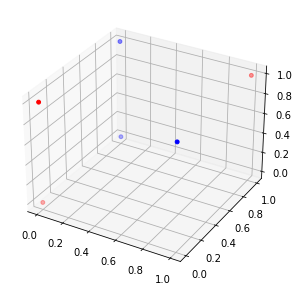

In [1]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
x = np.array([0, 1, 0])
y = np.array([0, 1, 0])
z = np.array([0, 1, 1])

x2 = np.array([0, 1, 0])
y2 = np.array([1, 0, 1])
z2 = np.array([1, 1, 0])

fig = plt.figure(figsize=(5, 5))

ax = fig.gca(projection='3d')

ax.scatter(x,y,z, marker='o', s=15, c='red')
ax.scatter(x2,y2,z2, marker='o', s=15, c='blue')

plt.show()



## 겹치는지 확인해보자

- 위와 같이 각 점의 형태를 면으로 색칠하여 나열하면 아래와 같은 그림으로 나타내어진다.

---

<img src="./problem1_matplot_img.png" width="300" height="200">

---

- 이와 같이 서로 겹쳐짐을 확인할 수 있다.

### MLP를 적용해야한다!

- 각 면끼리 겹치게 되기 때문에 단층 퍼셉트론으로는 오차를 줄이기가 어렵다.  
따라서 MLP를 적용하여 해당 문제를 해결해야한다. 필자는 다음과 같이 나눔으로써 최소 오차를 만들 수 있다고 생각한다.

---

<img src="./problem1_matplot_img2.png" width="300" height="200">

---

## 코드로 적용해보잣!

- 아래 코드는 위의 문제를 이해하고 퍼셉트론 사이에 은닉층을 두어 문제를 해결하였다.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# device = 'cuda' if torch.has_cuda else 'cpu'

x_train = torch.FloatTensor([[0,0,0],[0,1,1],[1,1,1],[1,0,1],[0,0,1],[0,1,0]])
y_train = torch.FloatTensor([[1], [-1], [1], [-1], [1], [-1]])

In [3]:
model = nn.Sequential(
    nn.Linear(3, 3, bias=True),
    nn.Tanh(),
    nn.Linear(3, 1, bias=True),
    nn.Tanh()
)
cost_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
# criterion = nn.BCELoss().to(device)



In [4]:
for step in range(3001):
    optimizer.zero_grad()
    hypothesis = model(x_train)
    cost = cost_function(hypothesis, y_train)
    cost.backward()
    optimizer.step()
    if step % 100 == 0:
        print(f"step: {step}, cost: {cost.item():.12f}")

step: 0, cost: 1.060966610909
step: 100, cost: 0.650510370731
step: 200, cost: 0.484399408102
step: 300, cost: 0.395689517260
step: 400, cost: 0.362080693245
step: 500, cost: 0.109913952649
step: 600, cost: 0.031472627074
step: 700, cost: 0.017010373995
step: 800, cost: 0.011310185306
step: 900, cost: 0.008340322413
step: 1000, cost: 0.006545700133
step: 1100, cost: 0.005355318543
step: 1200, cost: 0.004513317253
step: 1300, cost: 0.003889028914
step: 1400, cost: 0.003409262747
step: 1500, cost: 0.003029962303
step: 1600, cost: 0.002723138547
step: 1700, cost: 0.002470212057
step: 1800, cost: 0.002258393681
step: 1900, cost: 0.002078594640
step: 2000, cost: 0.001924192649
step: 2100, cost: 0.001790254726
step: 2200, cost: 0.001673042425
step: 2300, cost: 0.001569656655
step: 2400, cost: 0.001477830578
step: 2500, cost: 0.001395761035
step: 2600, cost: 0.001321995631
step: 2700, cost: 0.001255356241
step: 2800, cost: 0.001194874756
step: 2900, cost: 0.001139749424
step: 3000, cost: 0.00

In [5]:
with torch.no_grad():
    hypothesis = model(x_train)
    predicted = hypothesis.round()
    accuracy = (predicted == y_train).float().mean()
    print(f"\nHypothesis: {hypothesis.detach()}\nCorrect: {predicted.detach()}\nAccuracy: {accuracy.item()}")


Hypothesis: tensor([[ 0.9828],
        [-0.9714],
        [ 0.9514],
        [-0.9559],
        [ 0.9778],
        [-0.9751]])
Correct: tensor([[ 1.],
        [-1.],
        [ 1.],
        [-1.],
        [ 1.],
        [-1.]])
Accuracy: 1.0


# 문제 2

## 다음 분류 문제에 답하시오.

<img src="./problem2.png" width="1000" height="500">

## 2-1

### 이 부류 문제를 해결하는 다층 퍼셉트론을 각각 제시하시오.

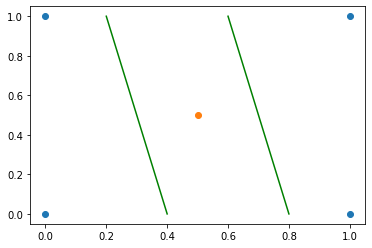

In [6]:
x_values = [0, 0, 1, 1]
y_values = [0, 1, 0, 1]
x_other_value = [0.5]
y_other_value = [0.5]

line1_x = [0.2, 0.4]
line1_y = [1.0, 0.0]
line2_x = [0.6, 0.8]
line2_y = [1.0, 0.0]

plt.scatter(x_values, y_values)
plt.scatter(x_other_value, y_other_value)
plt.plot(line1_x, line1_y, color="green")
plt.plot(line2_x, line2_y, color="green")
plt.show()

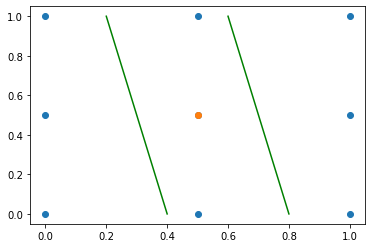

In [7]:
x_values = [0, 0, 0, 0.5, 0.5, 0.5, 1, 1, 1]
y_values = [0, 0.5, 1, 0, 0.5, 1, 0, 0.5, 1]
x_other_value = [0.5]
y_other_value = [0.5]

line1_x = [0.2, 0.4]
line1_y = [1.0, 0.0]
line2_x = [0.6, 0.8]
line2_y = [1.0, 0.0]
plt.scatter(x_values, y_values)
plt.scatter(x_other_value, y_other_value)
plt.plot(line1_x, line1_y, color="green")
plt.plot(line2_x, line2_y, color="green")
plt.show()

In [8]:
import torch

In [9]:
x_train = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1], [0.5, 0.5]])
y_train = torch.FloatTensor([[1], [1], [1], [1], [0]])

In [10]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 6, bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(6, 1, bias=True),
    torch.nn.ReLU()
)

In [11]:
cost_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [12]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(x_train)
    cost = cost_function(hypothesis, y_train)
    cost.backward()
    optimizer.step()
    if step % 100 == 0:
        print(f"step: {step}, cost: {cost.item():.12f}")

step: 0, cost: 0.299317061901
step: 100, cost: 0.161276847124
step: 200, cost: 0.157026752830
step: 300, cost: 0.152657151222
step: 400, cost: 0.146876841784
step: 500, cost: 0.141197279096
step: 600, cost: 0.136311829090
step: 700, cost: 0.131268784404
step: 800, cost: 0.125976607203
step: 900, cost: 0.120428822935
step: 1000, cost: 0.114669039845
step: 1100, cost: 0.109230890870
step: 1200, cost: 0.104848697782
step: 1300, cost: 0.100589215755
step: 1400, cost: 0.096462793648
step: 1500, cost: 0.092286013067
step: 1600, cost: 0.088161632419
step: 1700, cost: 0.083936318755
step: 1800, cost: 0.079717420042
step: 1900, cost: 0.075499162078
step: 2000, cost: 0.070695534348
step: 2100, cost: 0.065322987735
step: 2200, cost: 0.060058079660
step: 2300, cost: 0.054765969515
step: 2400, cost: 0.049543168396
step: 2500, cost: 0.044533647597
step: 2600, cost: 0.039715074003
step: 2700, cost: 0.035186149180
step: 2800, cost: 0.031024282798
step: 2900, cost: 0.027202829719
step: 3000, cost: 0.02

In [13]:
with torch.no_grad():
    hypothesis = model(x_train)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == y_train).float().mean()
    print(f"\nHypothesis: {hypothesis.detach()}\nPredict: {predicted.detach()}\nAccuracy: {accuracy.item()}")


Hypothesis: tensor([[9.9994e-01],
        [9.9995e-01],
        [1.0000e+00],
        [9.9993e-01],
        [1.9687e-04]])
Predict: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]])
Accuracy: 1.0


## 2-2

### 은닉 노드를 2개만 가진 퍼셉트론으로 오른쪽 상황을 해결할 수 있는지 답하시오. 가능하다면 은닉 노드 2개인 다층 퍼셉트론을 채택하는 것이 유리한지를 일반화 능력 측면에서 판단하시오.

In [14]:
import torch

In [15]:
x_train = torch.FloatTensor([[0, 0], [0, 0.5], [0, 1], [0.5, 0], [0.5, 0.5], [0.5, 1], [1, 0], [1, 0.5], [1, 1]])
y_train = torch.FloatTensor([[1], [1], [1], [1], [0], [1], [1], [1], [1]])

In [16]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 2, bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 1, bias=True),
    torch.nn.ReLU()
)
cost_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [17]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(x_train)
    cost = cost_function(hypothesis, y_train)
    cost.backward()
    optimizer.step()
    if step % 100 == 0:
        print(f"step: {step}, cost: {cost.item():.12f}")

step: 0, cost: 0.121042355895
step: 100, cost: 0.100484631956
step: 200, cost: 0.099026352167
step: 300, cost: 0.098806619644
step: 400, cost: 0.098771847785
step: 500, cost: 0.098766423762
step: 600, cost: 0.098765589297
step: 700, cost: 0.098765447736
step: 800, cost: 0.098765425384
step: 900, cost: 0.098765432835
step: 1000, cost: 0.098765425384
step: 1100, cost: 0.098765425384
step: 1200, cost: 0.098765425384
step: 1300, cost: 0.098765440285
step: 1400, cost: 0.098765432835
step: 1500, cost: 0.098765432835
step: 1600, cost: 0.098765440285
step: 1700, cost: 0.098765432835
step: 1800, cost: 0.098765440285
step: 1900, cost: 0.098765447736
step: 2000, cost: 0.098765447736
step: 2100, cost: 0.098765440285
step: 2200, cost: 0.098765447736
step: 2300, cost: 0.098765440285
step: 2400, cost: 0.098765447736
step: 2500, cost: 0.098765447736
step: 2600, cost: 0.098765447736
step: 2700, cost: 0.098765447736
step: 2800, cost: 0.098765440285
step: 2900, cost: 0.098765447736
step: 3000, cost: 0.09

In [18]:
with torch.no_grad():
    hypothesis = model(x_train)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == y_train).float().mean()
    print(f"\nHypothesis: {hypothesis.detach()}\nPredict: {predicted.detach()}\nAccuracy: {accuracy.item()}")


Hypothesis: tensor([[0.8889],
        [0.8889],
        [0.8889],
        [0.8889],
        [0.8889],
        [0.8889],
        [0.8889],
        [0.8889],
        [0.8889]])
Predict: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
Accuracy: 0.8888888955116272


### 바람직하지 않다!
- 이와 같이 은닉노드를 2개 두는 경우에는 정확도가 떨어지는 것을 확인할 수 있다.
- 그렇기에 은닉노드의 개수가 최소 10개 이상인 퍼셉트론을 택하는 것이 바람직하다고 생각한다. 

## 은닉노드가 10개일 때는 어떨까?
- 아래는 은닉노드의 개수가 10개일 경우의 코드이다.

In [19]:
x_train = torch.FloatTensor([[0, 0], [0, 0.5], [0, 1], [0.5, 0], [0.5, 0.5], [0.5, 1], [1, 0], [1, 0.5], [1, 1]])
y_train = torch.FloatTensor([[1], [1], [1], [1], [0], [1], [1], [1], [1]])

In [20]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 10, bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1, bias=True),
    torch.nn.ReLU()
)
cost_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [21]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(x_train)
    cost = cost_function(hypothesis, y_train)
    cost.backward()
    optimizer.step()
    if step % 100 == 0:
        print(f"step: {step}, cost: {cost.item():.12f}")

step: 0, cost: 0.885936498642
step: 100, cost: 0.092258065939
step: 200, cost: 0.079084679484
step: 300, cost: 0.063147678971
step: 400, cost: 0.044331461191
step: 500, cost: 0.028946856037
step: 600, cost: 0.017155788839
step: 700, cost: 0.009440665133
step: 800, cost: 0.004928270821
step: 900, cost: 0.002680752892
step: 1000, cost: 0.001467528171
step: 1100, cost: 0.000848092372
step: 1200, cost: 0.000493300613
step: 1300, cost: 0.000291227276
step: 1400, cost: 0.000185193610
step: 1500, cost: 0.000125949737
step: 1600, cost: 0.000088790424
step: 1700, cost: 0.000062818901
step: 1800, cost: 0.000044731285
step: 1900, cost: 0.000032408079
step: 2000, cost: 0.000023936627
step: 2100, cost: 0.000017594897
step: 2200, cost: 0.000012892026
step: 2300, cost: 0.000009476814
step: 2400, cost: 0.000006964906
step: 2500, cost: 0.000005156754
step: 2600, cost: 0.000003809509
step: 2700, cost: 0.000002831117
step: 2800, cost: 0.000002072945
step: 2900, cost: 0.000001523761
step: 3000, cost: 0.00

In [22]:
with torch.no_grad():
    hypothesis = model(x_train)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == y_train).float().mean()
    print(f"\nHypothesis: {hypothesis.detach()}\nPredict: {predicted.detach()}\nAccuracy: {accuracy.item()}")


Hypothesis: tensor([[1.0000e+00],
        [1.0000e+00],
        [1.0000e+00],
        [1.0000e+00],
        [1.0133e-06],
        [1.0000e+00],
        [1.0000e+00],
        [1.0000e+00],
        [1.0000e+00]])
Predict: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.]])
Accuracy: 1.0


# 문제 3

## 다음에 답하시오.

<img src="./problem3.png" width="1200" height="500">
<img src="./problem3_img.png" width="400" height="500">

## 1. 어떤 샘플이 한 번도 선택되지 못할 확률은?
- 하나의 샘플 외 다른 59,999개의 샘플은 선택될 확률이기 때문에
59,999 / 60, 000 의 확률을 60만 거듭제곱을 한 결과가 해당 문제의 확률이다. 이는 다음과 같다.

In [23]:
print(f"{(59999/60000)**600000:.12f}")

0.000045396147


즉 0.0045396147% 이며 극히 낮은 확률임을 알 수 있다.

## 2. 어떤 부류에 속한 모든 샘플이 한 번도 선택되지 못할 확률은?
- 6000개의 샘플이 한 번도 선택되지 못할 확률은
(60,000 - 6,000) / 60,000 에서의 60만 거듭제곱과 같은 확률이다.

In [24]:
print(f"{((60000-6000)/60000)**600000}")

0.0


위 값을 통해 한 없이 0에 수렴함을 알 수 있다.

## 3. 1과 2의 분석 결과를 토대로 랜덤 샘플링 방법의 유효성에 대한 의견을 제시하시오.

- 랜덤으로 샘플을 뽑았을 경우 단 한 번도 선택되지 않을 확률이 매우 낮기 때문에 골고루 뽑아 trainset에 활용할 수 있어 효율성이 좋다고 볼 수 있다.